In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [41]:
boston=datasets.load_boston()
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['Target'])

In [42]:
boston_pd=pd.concat([features,target],axis=1)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
boston_pd.shape

(506, 14)

In [44]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [45]:
boston_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

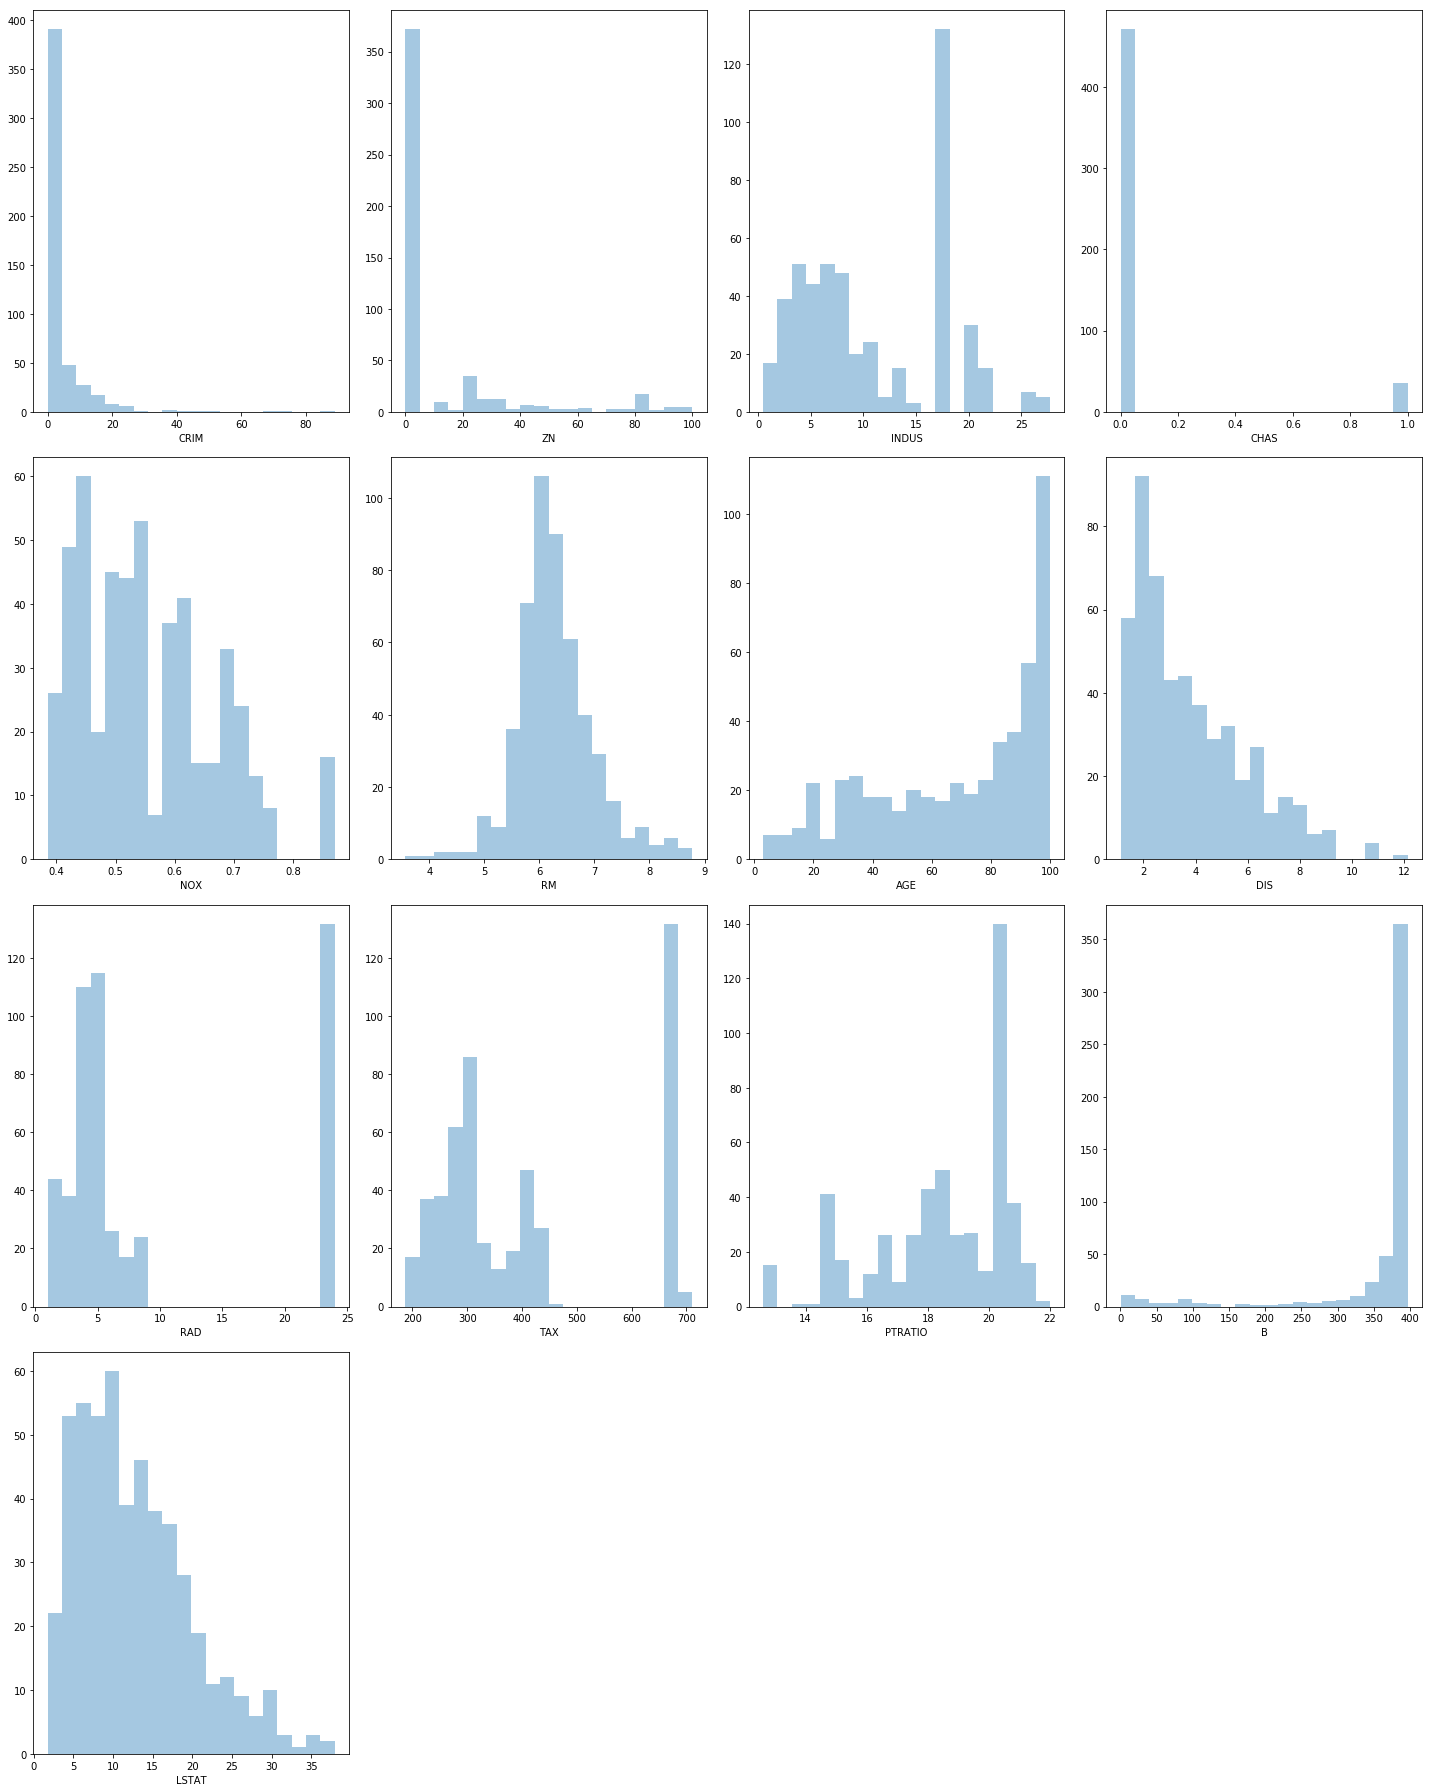

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in boston.feature_names:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(boston_pd[column],bins=20,kde=False)
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

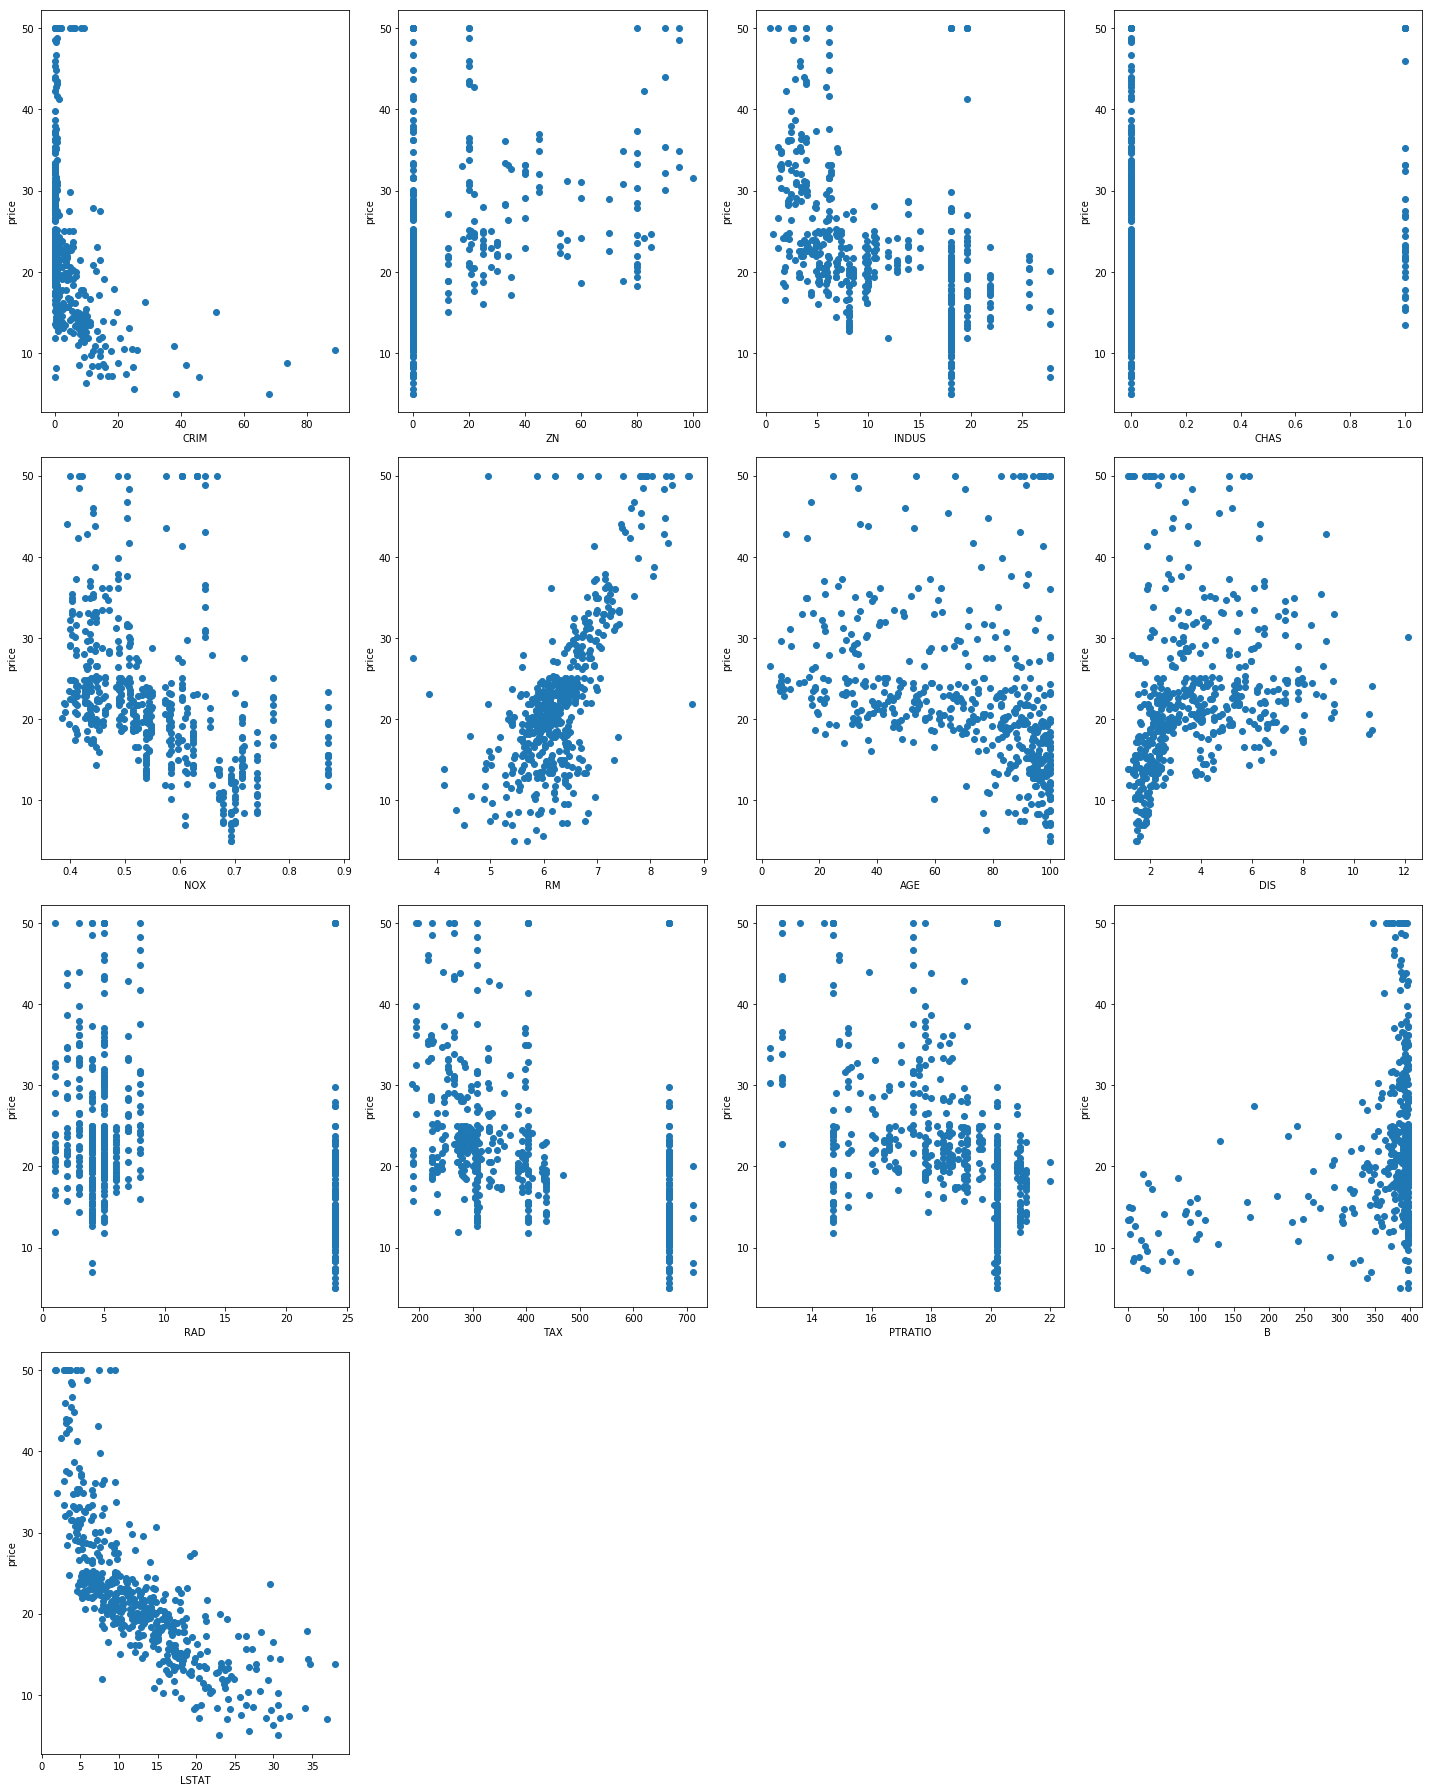

In [49]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in boston.feature_names:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(boston_pd[column],target)
        plt.xlabel(column)
        plt.ylabel('price')
    plotnumber+=1
plt.tight_layout()

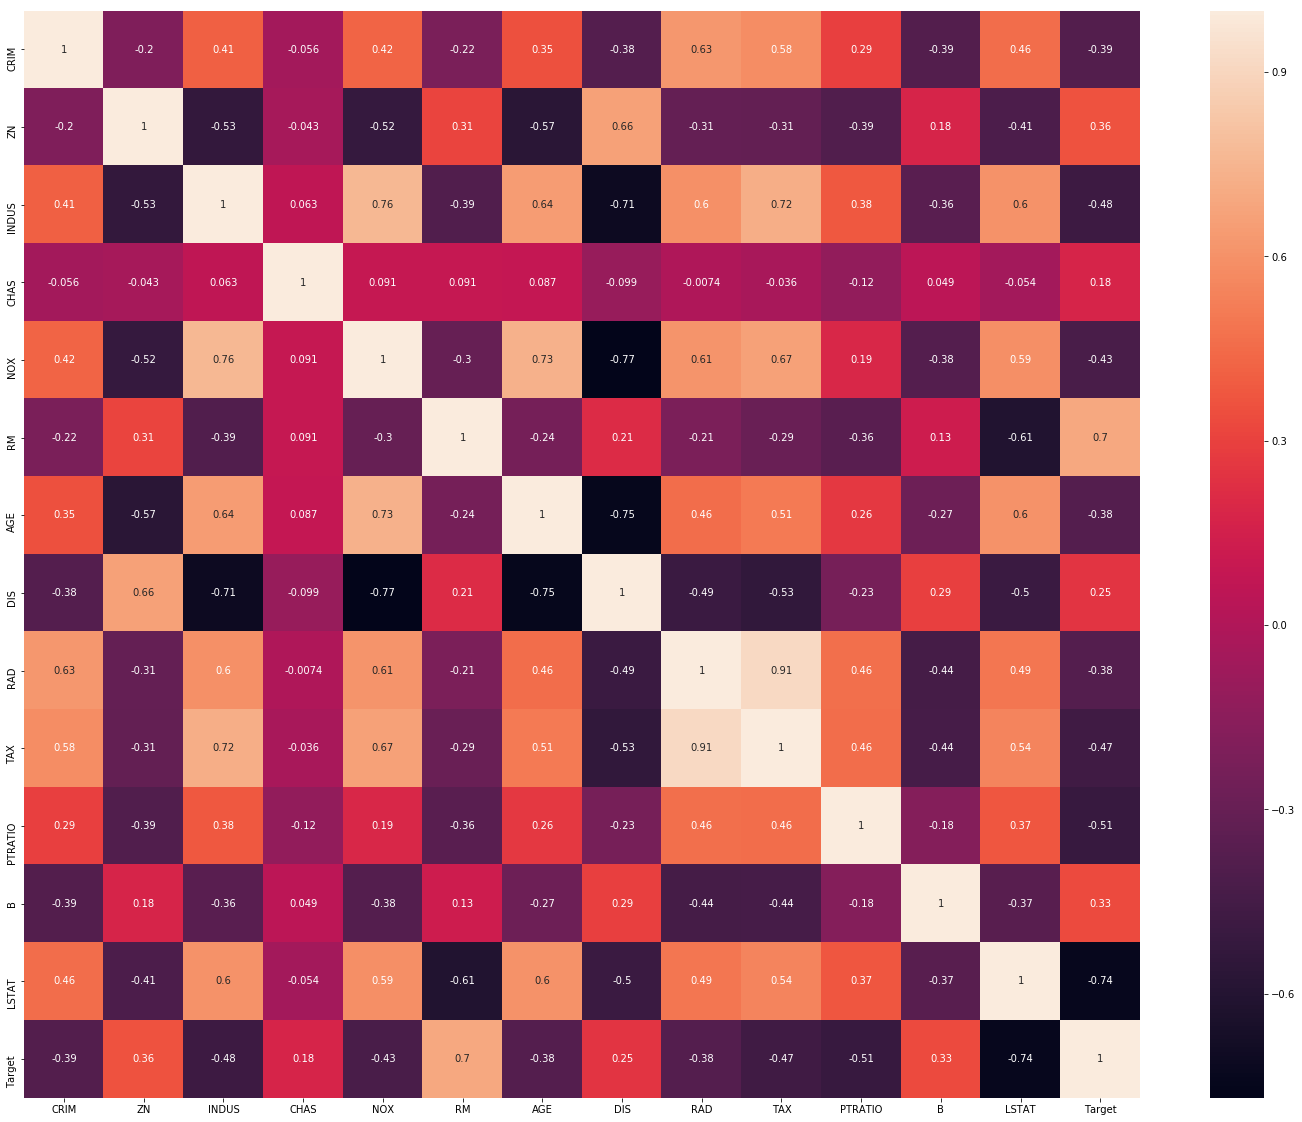

In [58]:
corrmat = boston_pd.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,20))
sns.heatmap(boston_pd[top_corr_features].corr(),annot=True)

In [71]:
X=boston_pd.copy()

In [72]:
X.drop(columns=['RAD'],inplace=True)

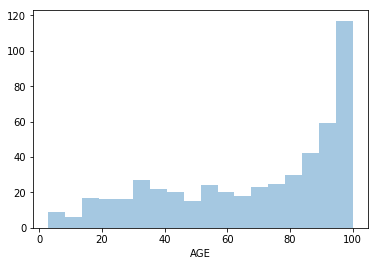

In [73]:
sns.distplot(X['AGE'],bins=18,kde=False)

In [74]:
X.loc[X['AGE']<=30,'AGE']=0
X.loc[(X['AGE']>30) & (X['AGE']<=60),'AGE']=1
X.loc[(X['AGE']>60) & (X['AGE']<=80),'AGE']=2
X.loc[(X['AGE']>80) & (X['AGE']<= 90), 'AGE'] = 3
X.loc[ X['AGE']>90, 'AGE'] = 4

In [75]:
X['AGE'].value_counts()

4.0    168
1.0    121
2.0     81
3.0     72
0.0     64
Name: AGE, dtype: int64

In [79]:
x_train=X
y=target

In [82]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
random_cls=RandomForestRegressor()
random_cls(x_train,y_train)